In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [3]:
dataset_train.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [6]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [7]:
dataset_train.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


# Stock Price Column to Train Your Model

In [8]:
training_set = dataset_train.iloc[:1:2].values
print(training_set)
print(training_set.shape)

[['1/3/2012' 325.25 332.83 324.97 '663.59' '7,380,500']]
(1, 6)


# Normalizing the Dataset

In [9]:
# Define the columns to be scaled, excluding the 'Date' column
numeric_columns = ['Open', 'High', 'Low', 'Close']  # Include all the numeric columns except 'Date'
for column in numeric_columns:
    dataset_train[column] = dataset_train[column].astype(str).str.replace(',', '').astype(float)



# Exclude the 'Date' column from the DataFrame
dataset_train = dataset_train[numeric_columns]

# Perform scaling on the numeric columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_training_set = scaler.fit_transform(dataset_train)
scaled_training_set

array([[0.08581368, 0.09640129, 0.09044931, 0.23757287],
       [0.09701243, 0.09834351, 0.09823458, 0.24151427],
       [0.09433366, 0.09251685, 0.09408623, 0.22878051],
       ...,
       [0.95725128, 0.95807422, 0.95844067, 0.40495845],
       [0.93796041, 0.94257381, 0.95033338, 0.40184391],
       [0.93688146, 0.93669113, 0.93421352, 0.38672602]])

# Creating X_train and y_train Data Structures

In [10]:
x_train = []
y_train = []
for i in range(60,1250):
    x_train.append(scaled_training_set[i-60:i,0])
    y_train.append(scaled_training_set[i,0])
x_train = np.array(x_train)
y_train = np.array(y_train)    

In [11]:
print(x_train.shape)
print(y_train.shape)

(1190, 60)
(1190,)


# Reshape the data

In [29]:

x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

x_train.shape


# # Calculate the new shape for the reshaped array
# new_shape = (x_train.shape[0], x_train.shape[1], 1)

# # Reshape the array
# x_train = np.reshape(x_train, new_shape)
# x_train

(1190, 60, 1)

# Building the Model by Importing the Crucial Libraries and Adding Different Layers to LSTM

In [42]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout


In [43]:
regressor= Sequential()


regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], x_train.shape[2])))

regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences= True))

regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))

regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

regressor.compile(optimizer='adam', loss='mean_squared_error')
# Print summary to check the model architecture and input shape
regressor.summary()

# Check the shapes of your input data
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

# Train the model

regressor.fit(x_train, y_train, epochs=10, batch_size=32)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

# Extracting the Actual Stock Prices of Jan-2017

In [38]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
actual_stock_price = dataset_test.iloc[:,1:2].values
actual_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [60]:
from sklearn.preprocessing import MinMaxScaler

# Assuming you have training and test datasets named dataset_train and dataset_test

# Concatenate 'Open' column from both training and test datasets
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)

# Select the last 60 + len(dataset_test) entries as inputs
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

# Reshape inputs to a 2D array
inputs = inputs.reshape(-1, 1)

# Use the scaler to transform inputs
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(inputs)
inputs = scaler.transform(inputs)

# Create X_test sequences
X_test = []

# Assuming you want to create sequences of 60 days with a step of 1
for i in range(60, len(inputs)):
    X_test.append(inputs[i - 60:i, 0])

# Convert X_test to a NumPy array
X_test = np.array(X_test)

# Reshape X_test for compatibility with LSTM input
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test


array([[[0.3691268 ],
        [0.37620682],
        [0.35528856],
        ...,
        [0.52681828],
        [0.41557606],
        [0.40935422]],

       [[0.37620682],
        [0.35528856],
        [0.451298  ],
        ...,
        [0.41557606],
        [0.40935422],
        [0.36708861]],

       [[0.35528856],
        [0.451298  ],
        [0.4201888 ],
        ...,
        [0.40935422],
        [0.36708861],
        [0.46953443]],

       ...,

       [[0.54580562],
        [0.41085604],
        [0.36054495],
        ...,
        [0.83361939],
        [0.91214332],
        [1.        ]],

       [[0.41085604],
        [0.36054495],
        [0.24308088],
        ...,
        [0.91214332],
        [1.        ],
        [0.96674533]],

       [[0.36054495],
        [0.24308088],
        [0.06511478],
        ...,
        [1.        ],
        [0.96674533],
        [0.75166273]]])

# Predicting the Values for Jan 2017 Stock Prices

In [58]:
predicted_stock_price = regressor.predict(X_test)

predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 103ms/step


# Plotting the Actual and Predicted Prices for Google Stocks

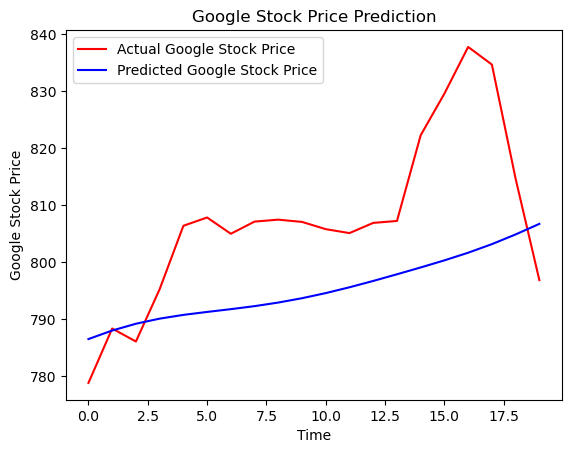

In [59]:
plt.plot(actual_stock_price, color = 'red', label = 'Actual Google Stock Price')

plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')

plt.title('Google Stock Price Prediction')

plt.xlabel('Time')

plt.ylabel('Google Stock Price')

plt.legend()